# Deskripsi kolom data app_train

* **LN_ID** = Loan ID
* **TARGER** = "Variabel target (1 - klien dengan keterlambatan pembayaran lebih dari X hari, 0 - semua kasus lainnya)"
* **CONTRACT_TYPE** = Identifikasi apakah pinjaman tunai atau bergulir
* **GENDER** = Gender of the client
* **NUM_CHILDREN** = Jumlah anak klien
* I**NCOME** = Pemasukan Bulanan klien
* **APPROVED_CREDIT** = Jumlah kredit pinjaman yang disetujui
* **ANNUITY** = Jumlah kredit yang disetujui dari pinjaman Anuitas pinjaman (jumlah yang harus dibayar setiap bulan)
* **PRICE** = Untuk pinjaman konsumen itu adalah harga barang yang diberikan pinjaman
* **INCOME_TYPE** = "Jenis pendapatan klien (pengusaha, bekerja, cuti hamil,…)"
* **EDUCATION** = The client highest education
* **FAMILY_STATUS** = Status keluarga klien
* **HOUSING_TYPE** = "Bagaimana situasi perumahan klien (menyewa, tinggal bersama orang tua, ...)"
* **DAYS_AGE** = Usia klien dalam hari pada saat aplikasi
* **DAYS_WORK** = Berapa hari sebelum lamaran orang tersebut memulai pekerjaan saat ini?
* **DAYS_REGISTRATION** = Berapa hari sebelum aplikasi klien mengubah pendaftarannya?
* **DAYS_ID_CHANGE** = Berapa hari sebelum aplikasi klien mengubah dokumen identitas yang dia gunakan untuk pinjaman?
* **WEEKDAYS_APPLY** = Pada hari apa dalam seminggu klien mengajukan pinjaman?
* **HOUR_APPLY** = Kira-kira pada jam berapa klien mengajukan pinjaman
* **ORGANIZATION_TYPE** = Jenis organisasi tempat klien bekerja
* **EXT_SCORE_1** = Skor yang dinormalisasi dari sumber data eksternal
* **EXT_SCORE_2** = Skor yang dinormalisasi dari sumber data eksternal
* **EXT_SCORE_3** = Skor yang dinormalisasi dari sumber data eksternal

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn import under_sampling, over_sampling

# Import Dataset

In [2]:
app_test = 'Dataset/app_test.csv'
app_train = 'Dataset/app_train.csv'

Sebelumnya saya sudah melakukan pemodelan dengan 2 file csv terpisah, dan pada notebook ini saya memutuskan menyatukannya dengan `pd.concat`. Alasannya karena akan memudahkan nanti pada saat splitting data menjadi data latih dan uji.

In [3]:
df = pd.read_csv(app_train)
df_test = pd.read_csv(app_test)
df = pd.concat([df,df_test])
df.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


Ketika saya menampilkan data, terdapat kolom baru yang muncul yaitu `Unnamed: 0` jadi saya memutuskan untuk menghapus kolom tersebut dan juga menghapus kolom LN_ID, karena data tersebut tidak akan berpengaruh terhadap model nanti.

In [4]:
# Menghapus kolom Unnamed: 0
df.drop(['LN_ID', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [5]:
df.shape

(76264, 22)

# Mini EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76264 entries, 0 to 14760
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TARGET             76264 non-null  int64  
 1   CONTRACT_TYPE      76264 non-null  object 
 2   GENDER             76264 non-null  object 
 3   NUM_CHILDREN       76264 non-null  int64  
 4   INCOME             76264 non-null  float64
 5   APPROVED_CREDIT    76264 non-null  float64
 6   ANNUITY            76263 non-null  float64
 7   PRICE              76182 non-null  float64
 8   INCOME_TYPE        76264 non-null  object 
 9   EDUCATION          76264 non-null  object 
 10  FAMILY_STATUS      76264 non-null  object 
 11  HOUSING_TYPE       76264 non-null  object 
 12  DAYS_AGE           76264 non-null  int64  
 13  DAYS_WORK          76264 non-null  int64  
 14  DAYS_REGISTRATION  76264 non-null  float64
 15  DAYS_ID_CHANGE     76264 non-null  int64  
 16  WEEKDAYS_APPLY     762

In [7]:
df.describe()

,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
count,76264.000000,76264.000000,7.626400e+04,7.626400e+04,76263.000000,7.618200e+04,76264.000000,76264.000000,76264.000000,76264.000000,76264.000000,33107.000000,7.611100e+04,61106.000000
mean,0.080929,0.411846,1.687726e+05,5.973883e+05,27091.873451,5.367659e+05,-16051.190824,65007.064106,-4979.241897,-2998.837643,12.057524,0.504667,5.144614e-01,0.511002
std,0.272728,0.715218,1.274181e+05,4.012680e+05,14471.032249,3.681752e+05,4364.646420,142258.513548,3521.482107,1511.471106,3.267276,0.210659,1.909099e-01,0.194722
min,0.000000,0.000000,2.610000e+04,4.500000e+04,2164.500000,4.500000e+04,-25229.000000,-17912.000000,-22928.000000,-6337.000000,0.000000,0.017095,8.173617e-08,0.000527
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16528.500000,2.385000e+05,-19715.000000,-2764.000000,-7495.000000,-4305.000000,10.000000,0.336863,3.930102e-01,0.370650
50%,0.000000,0.000000,1.485000e+05,5.120640e+05,24853.500000,4.500000e+05,-15742.000000,-1211.000000,-4505.000000,-3269.000000,12.000000,0.509140,5.659453e-01,0.535276
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12435.000000,-276.000000,-1992.000000,-1715.000000,14.000000,0.677167,6.637416e-01,0.669057
max,1.000000,9.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,-7673.000000,365243.000000,0.000000,0.000000,23.000000,0.951624,8.549997e-01,0.896010


## Missing Value

Sebelum lanjut lebih jauh, saya ingin melihat apakah data tersebut memiliki missing value di dalamnya atau tidak menggunakan `isnull().sum()`

In [8]:
df.isnull().sum()

TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   82
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          43157
EXT_SCORE_2            153
EXT_SCORE_3          15158
dtype: int64

Setelah di lihat ternyata pada kolom `EXT_SCORE_1` memiliki banyak sekali nilai missing. Di sini saya bisa ajah menghapus data tersebut namun resikonya data akan menjadi jauh lebih sedikit, jadi saya memutuskan untuk `Drop` data `EXT_SCORE_1` `EXT_SCORE_2` `EXT_SCORE_3`, dan mengisi sisanya dengan `mean`. Karena saya kurang tau tentang data `EXT_SCORE` saya tidak tau itu data normalisasi dari data apa, namun dengan menghapus kolom tersebut akan meningkatkan akurasi model nantinya.

In [9]:
df.drop(['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3'], axis=1, inplace=True) # Drop 3 kolom tersebut
df.fillna(df.mean(), inplace=True) # mengisi sisa kolom yang lain dengan nilai mean()
df.isnull().sum()

C:\Users\gufra\AppData\Local\Temp\ipykernel_10584\3718111082.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


TARGET               0
CONTRACT_TYPE        0
GENDER               0
NUM_CHILDREN         0
INCOME               0
APPROVED_CREDIT      0
ANNUITY              0
PRICE                0
INCOME_TYPE          0
EDUCATION            0
FAMILY_STATUS        0
HOUSING_TYPE         0
DAYS_AGE             0
DAYS_WORK            0
DAYS_REGISTRATION    0
DAYS_ID_CHANGE       0
WEEKDAYS_APPLY       0
HOUR_APPLY           0
ORGANIZATION_TYPE    0
dtype: int64

# Univariate Analysis

## Categorical

In [10]:
categorical_features = ['CONTRACT_TYPE', 'GENDER', 'HOUSING_TYPE', 'ORGANIZATION_TYPE']

Di sini saya juga mencoba melihat presentase pada data Categorical, di sini saya hanya melihat beberapa data categorical yang membuat saya penasaran untuk melihatnya seperti 'CONTRACT_TYPE', 'GENDER', 'HOUSING_TYPE', 'ORGANIZATION_TYPE'. 

                 jumlah sampel  persentase
Cash loans               68980        90.4
Revolving loans           7284         9.6


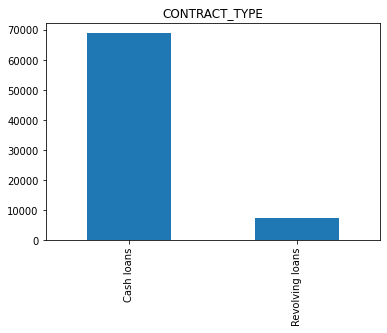

In [11]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_categorical = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_categorical)
count.plot(kind='bar', title=feature);

Kita bisa lihat dari data presentase `pinjaman tunai` jauh lebih tinggi dan sangat sedikit untuk `pinjaman bergulir`. Dari sini kita tau bahwa pinjaman cash selalu terjadi secara berulang, dan jarang menggunakan pinjaman bergulir.

   jumlah sampel  persentase
F          50234        65.9
M          26030        34.1


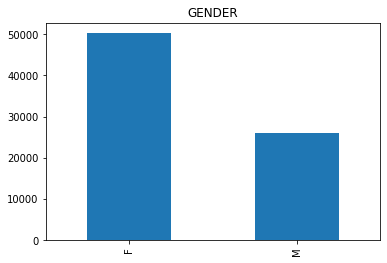

In [12]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_categorical = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_categorical)
count.plot(kind='bar', title=feature);

Begitupun pada data `GENDER` rata-rata penerima pinjaman adalah seorang wanita, dan untuk laki-laki setengah lebih sedikit ketimbang wanita.

                     jumlah sampel  persentase
House / apartment            67783        88.9
With parents                  3588         4.7
Municipal apartment           2734         3.6
Rented apartment              1206         1.6
Office apartment               662         0.9
Co-op apartment                291         0.4


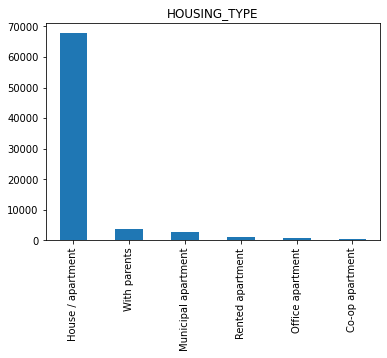

In [13]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_categorical = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_categorical)
count.plot(kind='bar', title=feature);

Dan penerima pinjaman paling banyak bagi orang yang memiliki tipe rumah `House/Apartemen`.

                        jumlah sampel  persentase
Business Entity Type 3          16836        22.1
NA1                             13980        18.3
Self-employed                    9491        12.4
Other                            4130         5.4
Medicine                         2717         3.6
Business Entity Type 2           2603         3.4
Government                       2536         3.3
School                           2198         2.9
Trade: type 7                    1900         2.5
Kindergarten                     1735         2.3
Construction                     1710         2.2
Business Entity Type 1           1453         1.9
Transport: type 4                1274         1.7
Industry: type 9                  828         1.1
Trade: type 3                     818         1.1
Industry: type 3                  791         1.0
Housing                           756         1.0
Security                          755         1.0
Industry: type 11                 668         0.9


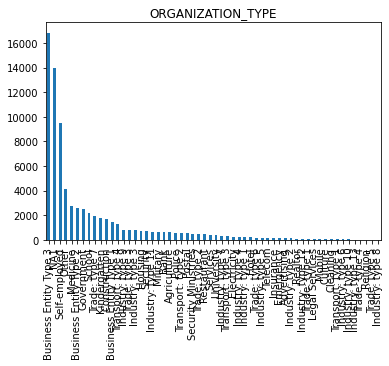

In [14]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_categorical = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_categorical)
count.plot(kind='bar', title=feature);

## Numerical

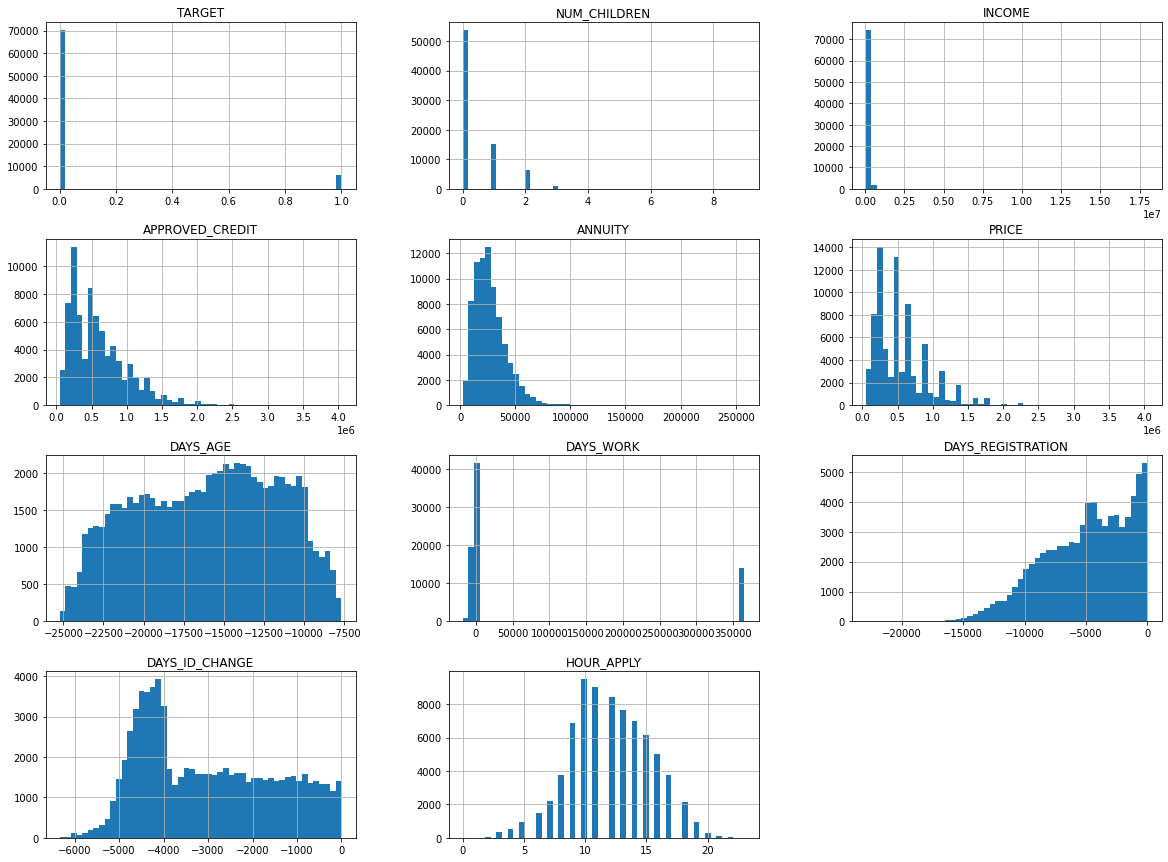

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()

* Kita bisa melihat pada data `TARGET` bahwa jumlah sample `0` sangat besar, yang berarti data kita Imbalance dan akan sangat ngaruh nanti, saya akan mengatasi masalah tersebut nanti di bawah.
* `PRICE` pun semakin menurun dengan di ikuti banyaknya sample pada data.
* `APPROVED_CREDIT`, `ANNUITY`, `PRICE` jika kita lihat mereka seperti memiliki korelasi dari bentuk grafiknya, akan tetapi nanti saya akan melihatnya lagi dengan corr() di bawah.

# Multivariate Analysis

## Categorical

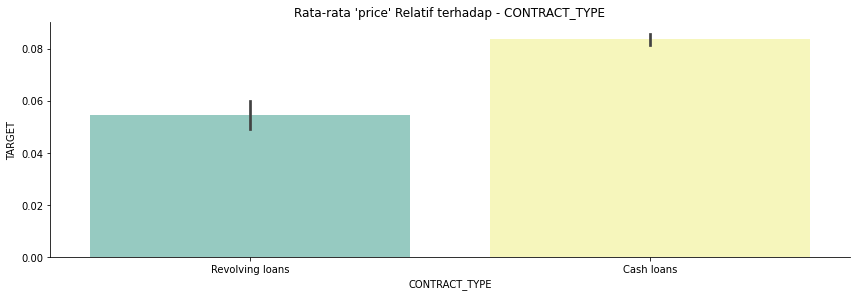

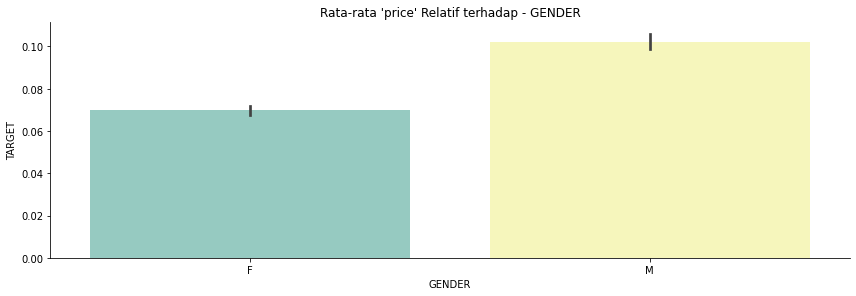

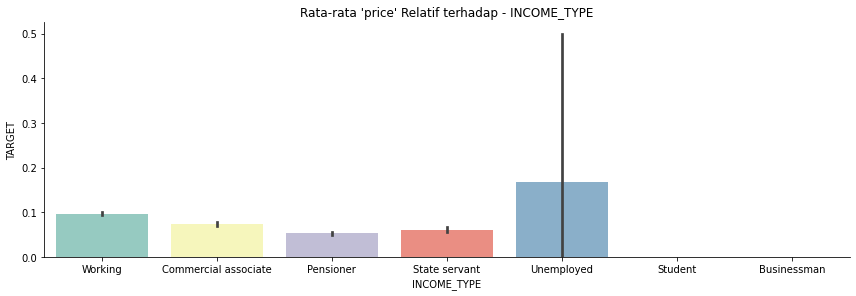

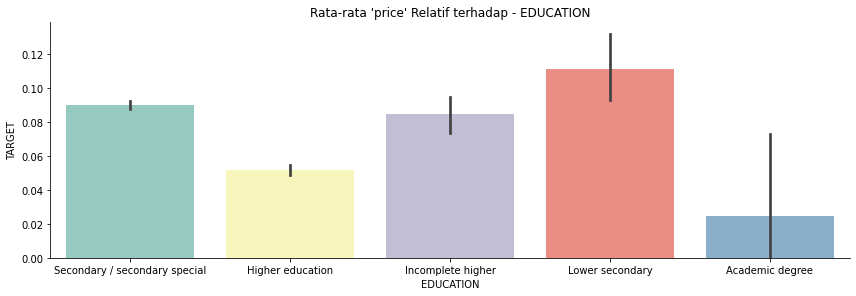

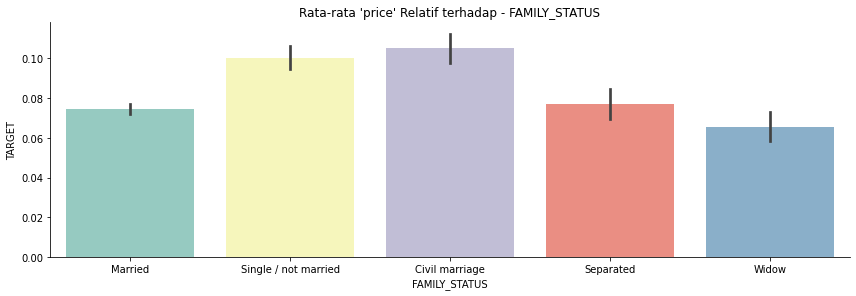

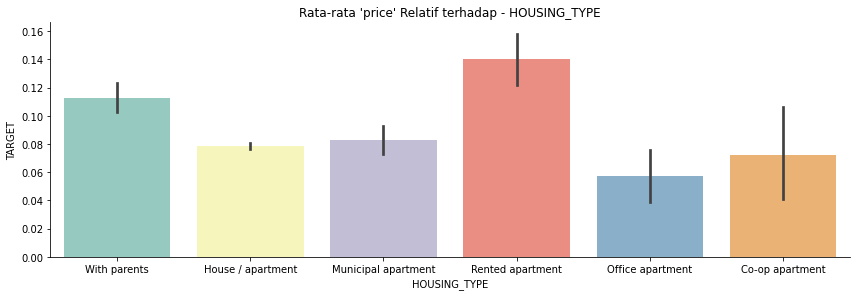

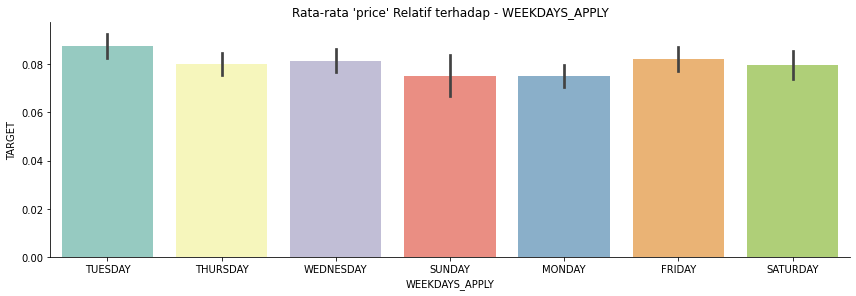

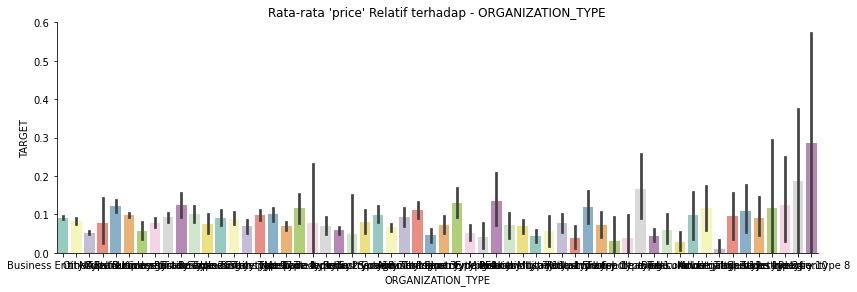

In [16]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
    sns.catplot(x=col, y="TARGET", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

## Numerical

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

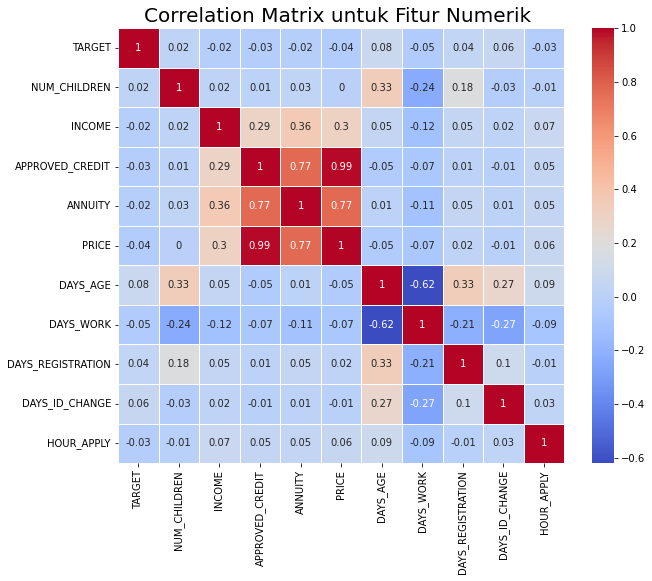

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Saya mencoba melihat korelasi antar fitur dengan `heatmap`, sama seperti tebakan saya bahwa 3 kolom memiliki korelasi yang kuat, terlebih pada kolom `APPROVED_CREDIT` dan `PRICE`.

3 Fitur terpenting dalam data:
* APPROVED_CREDIT
* PRICE
* ANNUITY

Fitur tersebut mengandung jumlah pinjaman yang di setujui, jumlah yang harus di bayar setiap bulannya, harga barang yang diberikan pinjaman. Mungkin dari besarnya jumlah yang pinjamkan aka sangat berpegaruh apakah yang di beri pinjam akan melunasinya tepat waktu atau telat atau mungkin yang lebih parah tidak melunasinya.

# Data Preparation

Pada tahap ini saya akan melakukan PCA terhadap 2 fitur penting yaitu `APPROVED_CREDIT` dan `PRICE`, karena 2 fitur tersebut memiliki korelasi yang sangat tinggi bahkan hampir 100%.
Juga saya akan melakukan PCA terhadap data `DAYS_AGE` dan `DAYS_WORK` memang korelasi nya tidak sekuat sebelumnya, namun alangkah baiknya satukan dua fitur tersebut.

## PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca2 = PCA(n_components=1, random_state=123)
pca.fit(df[['PRICE','APPROVED_CREDIT']])
pca2.fit(df[['DAYS_AGE','DAYS_WORK']])
df['PRICE_APPROVED'] = pca.transform(df.loc[:, ('PRICE','APPROVED_CREDIT')]).flatten()
df['AGE_WORK'] = pca2.transform(df.loc[:, ('DAYS_AGE','DAYS_WORK')]).flatten()
df.drop(['PRICE','APPROVED_CREDIT'], axis=1, inplace=True)
df.drop(['DAYS_AGE','DAYS_WORK'], axis=1, inplace=True)

## Convert Categorical into Numerical

Sebelum melakukan modeling saya  akan mencoba mengubah data categorical menjadi numerical agar bisa di proses oleh mesin. Saya menggunakan One-Hot Encoding dari pandas yaitu `get_dummies` saya juga menaruh parameter `drop_first=TRUE` untuk menghindari trap dummy variable.

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,TARGET,NUM_CHILDREN,INCOME,ANNUITY,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,PRICE_APPROVED,AGE_WORK,CONTRACT_TYPE_Revolving loans,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,1,67500.0,10125.0,-119.0,-2757,18,-516973.069584,-66001.979443,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,202500.0,49869.0,-1797.0,-2455,14,506824.546388,-69482.349454,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,180000.0,25060.5,-8737.0,-4312,14,-259406.486214,300271.465140,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,225000.0,26086.5,-4998.0,-4010,10,249156.321253,-75360.736337,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,135000.0,9000.0,-3524.0,-1644,11,-548762.307762,-66318.990490,1,...,0,0,0,0,0,0,0,0,0,0


## Splitting Data

Kemudian saya melakukan Splitting data menggunakan `train_test_split` dari scikit-learn. Dan seperti yang saya bilang sebelumnya bahwa data ini mengandung Imbalance yang di mana data `TARGET` memiliki sample yang tidak seimbang, dampaknya bisa membuat bias dalam data, dan prediksinya akan berat sebelah. Saya mengatasinya dengan RandomOverSampler untuk menyeimbangkan data `TARGET` nya.

Ngaruhnya pada data adalah data akan menjadi lebih banyak, namun baiknya kita memiliki data TARGET yang seimbang.

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(["TARGET"],axis =1)
y = df["TARGET"]

from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state = 128)
X, y = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 128)

In [21]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 140184
Total # of sample in train dataset: 112147
Total # of sample in test dataset: 28037


# Modeling

Di sini saya menggunakan Algoritma dari Scikit-Learn yaitu Random Forest, algoritma tersebut adalah algoritma ensemble dari Decision trees. Saya hanya mengatur parameter seperti `n_estimator` atau jumlah pohon sebanyak **500** dan `criterion` atau Fungsi untuk mengukur kualitas sebuah split adalah menggunakan **entropy**

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42)

Dan ketika saya melihat hasilnya ternyata sangat bagus yaitu 100% untuk `Training`, di situ saya mulai khawatir karena takutnya model yang saya buat Overfitting. Namun ketika saya melihat hasil `Testing` nya membuat saya cukup yakin yaitu sebesar 99%, jadi model yang di latih tidak Overfitting.

In [23]:
print('Accuracy Training: {:.2f} %'.format(rfc.score(X_train, y_train)*100))
print('Accuracy Testing: {:.2f} %'.format(rfc.score(X_test, y_test)*100))

Accuracy Training: 100.00 %
Accuracy Testing: 99.95 %


# Evaluate Metrik

Untuk memastikannya lagi saya ingin melihat evaluasi metrik dari model yang saya buat. Yang pertama saya menggunakan `Confusion Metrix` dan `Classification Report`.

Dengan *Confusion Metrix* saya bisa melihat hasil prediksi dari model, dengan melihat Nilai aktual dan juga prediksinya dengan sangat jelas.

Dan *Classifition Report* saya bisa melihat evaluasi dari `Precision`, `Recall`, `F1-Score` secara bersamaan sehingga tidak perlu lagi membuatnya secara terpisah.

[[14004    15]
 [    0 14018]]


0.9994649926882334

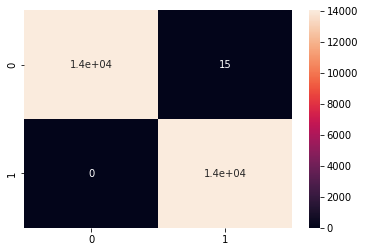

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
accuracy_score(y_test, y_pred)

In [25]:
# Precision Recall F1-Score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred, average=None)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14019
           1       1.00      1.00      1.00     14018

    accuracy                           1.00     28037
   macro avg       1.00      1.00      1.00     28037
weighted avg       1.00      1.00      1.00     28037



array([0.99946473, 0.99946526])

## K-Fold Cross Validation

Agar memastikan nya lagi saya ingin melihat evaluasi dari menggunakan K-Fold Cross Validation, yaitu dimana kita mencoba membuat beberapa skenario dan hasil keseluruh skenario di hitung nilai rata-ratanya atau mean. Saya mengatur `cv=3` atau saya membuat 5 skenario, kemudian hasil ke-lima skenario tersebut di hitung nilai rata-ratanya.

Dan saya dapatkan 99.61% untuk akurasinya, itu benar-benar akurasi yang bagus. Juga saya ingin melihat nilai dari Standard Deviasinya yaitu sebesar 0.04%.

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.61 %
Standard Deviation: 0.04 %


# Save Model

In [28]:
import pickle

filename = 'Loan.h5'
pickle.dump(rfc, open(filename, 'wb'))

# Load Model

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy: {:.2f} %'.format(result*100))

Accuracy: 99.95 %
